In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd
import xarray as xr
import rasterio
import lxml 

from rasterio.crs import CRS
from pyproj import Transformer
import numpy as np
from shapely.geometry import Point, Polygon

In [3]:
land_dir = r"C:\Users\bmaro\OneDrive\Desktop\LandCharacter"
print(os.listdir(land_dir))


illinois_stateplane = CRS.from_epsg(26971)  # Illinois State Plane East (NAD83)

wgs84 = CRS.from_epsg(4326)  # WGS84 Latitude/Longitude

['README-info-560_013.txt', 'SAVANT_10cm_DEM.tif', 'SAVANT_1m_contours.png', 'SAVANT_1m_DEM.kml', 'SAVANT_1m_DEM.tfw', 'SAVANT_1m_DEM.tif', 'SAVANT_1m_DEM_projected.asc', 'SAVANT_1m_DEM_projected.prj', 'SAVANT_1m_DEM_projected.tif', 'SAVANT_Agisoft_Report.pdf', 'SAVANT_DEM_and_orthophoto_readme.pdf', 'SAVANT_ortho_10cm.tif', 'SAVANT_ortho_reduced.png']


CRS: EPSG:26971
Bounds: BoundingBox(left=292962.0199249191, bottom=392905.76987422816, right=294658.0199249191, top=394002.76987422816)
Transform: | 1.00, 0.00, 292962.02|
| 0.00,-1.00, 394002.77|
| 0.00, 0.00, 1.00|
Elevation shape: (1097, 1696)
Units: metre


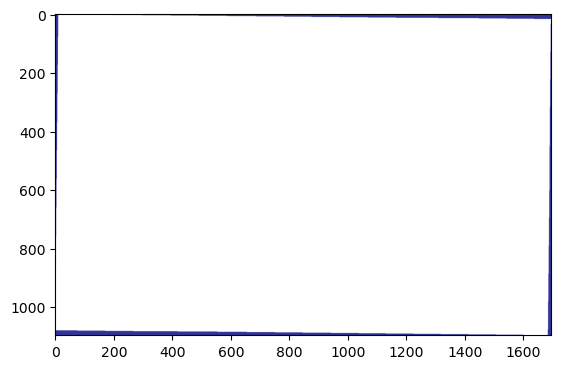

In [4]:
dem_10cm = 'SAVANT_10cm_DEM.tif'
dem_1m_proj = 'SAVANT_1m_DEM_projected.tif'

with rasterio.open(os.path.join(land_dir, dem_1m_proj)) as src:
    elevation = src.read(1)
    transform = src.transform
    bounds = src.bounds
    crs = src.crs
    print(f"CRS: {crs}")
    print(f"Bounds: {bounds}")
    print(f"Transform: {transform}")
    print(f"Elevation shape: {elevation.shape}")
    print(f"Units: {src.units[0]}")
    plt.imshow(elevation, cmap='terrain')
    plt.show()
    

In [5]:
# build dictionary of tower locations
towers = {}
towers['init'] = {'name':'init','label':'Initiation Tower'}
towers['rel'] = {'name':'rel','label':'Release Tower'}
towers['uconv'] = {'name':'uconv','label':'Upper Convergence Tower'}
towers['lconv'] = {'name':'lconv','label':'Lower Convergence Tower'}


In [6]:
towers['init']['lat_lon_str'] = "40°12′41.4576′′N,88°24′37.98′′W"
towers['rel']['lat_lon_str'] = "40°12 ′42.1596′′N,88°24′26.046′′W"
towers['uconv']['lat_lon_str'] = "40°12 ′39.783′′N,88°24′19.605′′W"
towers['lconv']['lat_lon_str'] = "40°12 ′36.9′′N,88°24′13.3′′W"

def deg_to_dec(coord_str):
    lat_str, lon_str = coord_str.split(',')

    lat_dec = round(float(lat_str.split('°')[0]) 
               + float(lat_str.split('°')[1].split('′')[0])/60
               + float(lat_str.split('°')[1].split('′')[1].split('′′')[0])/3600, 6)
    lon_dec = round(float(lon_str.split('°')[0]) 
               + float(lon_str.split('°')[1].split('′')[0])/60 
               + float(lon_str.split('°')[1].split('′')[1].split('′′')[0])/3600, 6)

    if "s" in coord_str.lower():
        lat_dec = (lat_dec*-1)
    if "w" in coord_str.lower():
        lon_dec = (lon_dec*-1)
        
    return [(lat_dec), (lon_dec)]


for tower, data in towers.items():
    print(f"{tower}: {data}")
    coords=deg_to_dec(towers[tower]['lat_lon_str'])
    towers[tower]['lat_lon'] = coords
    transformer = Transformer.from_crs(wgs84, illinois_stateplane, always_xy=True)
    x, y = transformer.transform(coords[1], coords[0])
    towers[tower]['x_y'] = [x, y]
    print(f"  lat/lon: {towers[tower]['lat_lon']}, projected x/y: {towers[tower]['x_y']}")






init: {'name': 'init', 'label': 'Initiation Tower', 'lat_lon_str': '40°12′41.4576′′N,88°24′37.98′′W'}
  lat/lon: [40.211516, -88.41055], projected x/y: [293426.78451102215, 393488.8263018386]
rel: {'name': 'rel', 'label': 'Release Tower', 'lat_lon_str': '40°12 ′42.1596′′N,88°24′26.046′′W'}
  lat/lon: [40.211711, -88.407235], projected x/y: [293709.00153141556, 393510.23896109697]
uconv: {'name': 'uconv', 'label': 'Upper Convergence Tower', 'lat_lon_str': '40°12 ′39.783′′N,88°24′19.605′′W'}
  lat/lon: [40.211051, -88.405446], projected x/y: [293861.23548035475, 393436.8307068228]
lconv: {'name': 'lconv', 'label': 'Lower Convergence Tower', 'lat_lon_str': '40°12 ′36.9′′N,88°24′13.3′′W'}
  lat/lon: [40.21025, -88.403694], projected x/y: [294010.3102076547, 393347.77200289717]


CRS: EPSG:26971
Bounds: BoundingBox(left=292962.0199249191, bottom=392905.76987422816, right=294658.0199249191, top=394002.76987422816)
Transform: | 1.00, 0.00, 292962.02|
| 0.00,-1.00, 394002.77|
| 0.00, 0.00, 1.00|
Elevation shape: (1097, 1696)
Units: metre
elevation at Initiation Tower: 235.9046173095703 m
Initiation Tower: col=464, row=513, shape=(1097, 1696)
elevation at Release Tower: 235.08413696289062 m
Release Tower: col=746, row=492, shape=(1097, 1696)
elevation at Upper Convergence Tower: 233.22525024414062 m
Upper Convergence Tower: col=899, row=565, shape=(1097, 1696)
elevation at Lower Convergence Tower: 231.7415771484375 m
Lower Convergence Tower: col=1048, row=654, shape=(1097, 1696)


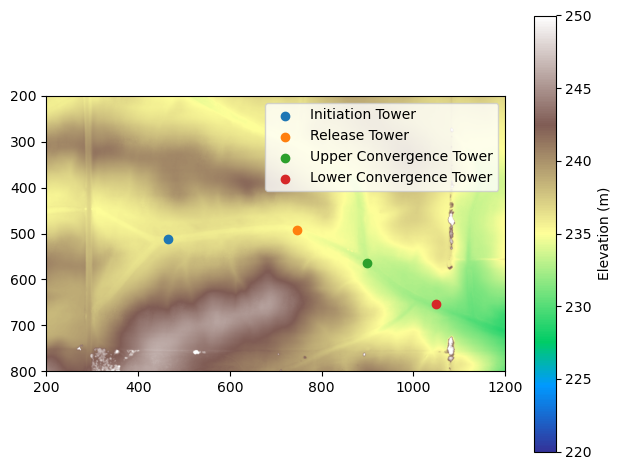

In [33]:
with rasterio.open(os.path.join(land_dir, dem_1m_proj)) as src:
    elevation = src.read(1)
    transform = src.transform
    bounds = src.bounds
    crs = src.crs
    print(f"CRS: {crs}")
    print(f"Bounds: {bounds}")
    print(f"Transform: {transform}")
    print(f"Elevation shape: {elevation.shape}")
    print(f"Units: {src.units[0]}")
    plt.imshow(elevation, cmap='terrain', vmin=220, vmax=250)
    plt.colorbar(label='Elevation (m)')
    for tower, data in towers.items():
        row, col = rasterio.transform.rowcol(transform, data['x_y'][0], data['x_y'][1])
        print(f'elevation at {data["label"]}: {elevation[row, col]} m')
        towers[tower]['elvation'] = elevation[row, col]
        print(f"{data['label']}: col={col}, row={row}, shape={elevation.shape}")
        plt.scatter(col, row, label=data['label'])
    plt.xlim(200, 1200)
    plt.ylim(800, 200)
    plt.legend()
    plt.tight_layout()
    plt.show()

100 m at 45° from Initiation Tower: row=443, col=535, elevation=237.5460968017578 m


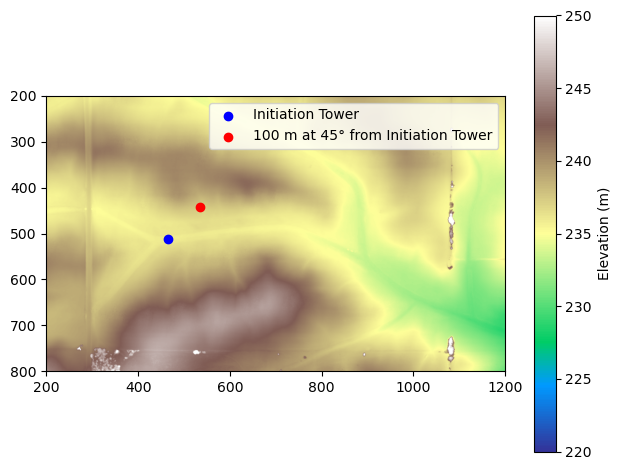

In [11]:
# Create a funciton to get row column at a distance and bearing from a tower
def get_row_col_from_tower(tower_key, distance_m, bearing_deg):
    tower = towers[tower_key]
    x0, y0 = tower['x_y']
    bearing_rad = np.deg2rad(bearing_deg)
    x_new = x0 + distance_m * np.sin(bearing_rad)
    y_new = y0 + distance_m * np.cos(bearing_rad)
    row, col = rasterio.transform.rowcol(transform, x_new, y_new)
    if 0 <= row < elevation.shape[0] and 0 <= col < elevation.shape[1]:
        elev = elevation[row, col]
    else:
        elev = None
    return row, col, elev
# Example usage
direction = 45  # degrees
distance = 100  # meters
row, col, elev = get_row_col_from_tower('init', distance, direction)
print(f"{distance} m at {direction}° from Initiation Tower: row={row}, col={col}, elevation={elev} m")
# plot point on map
plt.imshow(elevation, cmap='terrain', vmin=220, vmax=250)
plt.colorbar(label='Elevation (m)')
init_row, init_col = rasterio.transform.rowcol(transform, towers['init']['x_y'][0], towers['init']['x_y'][1])
plt.scatter(init_col, init_row, color='blue', label='Initiation Tower')
plt.scatter(col, row, color='red', label=f'{distance} m at {direction}° from Initiation Tower')
plt.xlim(200, 1200)
plt.ylim(800, 200)
plt.legend()
plt.tight_layout()
plt.show()

In [40]:
# Store the elevation profiles at any distance steps and bearings from each tower
distance_steps = [100]  
bearing_steps = np.arange(0, 360, 1)  # 0 to 359 degrees in 10 degree steps

elevation_points = pd.DataFrame(columns=['tower', 'distance', 'bearing', 'row', 'col', 'elevation', 'delta_elevation'])
for tower_key in towers.keys():
    for distance in distance_steps:
        for bearing in bearing_steps:
            row, col, elev = get_row_col_from_tower(tower_key, distance, bearing)
            if elev is not None:
                delta_elev = elev - towers[tower_key]['elvation']
            else:
                delta_elev = None
            temp_df = [tower_key, distance, bearing,  row, col, elev, delta_elev]
            elevation_points = pd.concat([elevation_points, pd.DataFrame([temp_df], columns=elevation_points.columns)], ignore_index=True)
            
    print(f"Elevation profile created for {tower_key}")

elevation_points

C:\Users\bmaro\AppData\Local\Temp\ipykernel_21616\1535118119.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  elevation_points = pd.concat([elevation_points, pd.DataFrame([temp_df], columns=elevation_points.columns)], ignore_index=True)


Elevation profile created for init
Elevation profile created for rel
Elevation profile created for uconv
Elevation profile created for lconv


,tower,distance,bearing,row,col,elevation,delta_elevation
0,init,100,0,413,464,239.314774,3.410156
1,init,100,1,413,466,239.431839,3.527222
2,init,100,2,414,468,239.515533,3.610916
3,init,100,3,414,469,239.497940,3.593323
4,init,100,4,414,471,239.628769,3.724152
...,...,...,...,...,...,...,...
1435,lconv,100,355,555,1039,235.560974,3.819397
1436,lconv,100,356,555,1041,235.635803,3.894226
1437,lconv,100,357,555,1043,235.701340,3.959763
1438,lconv,100,358,555,1044,235.722397,3.980820


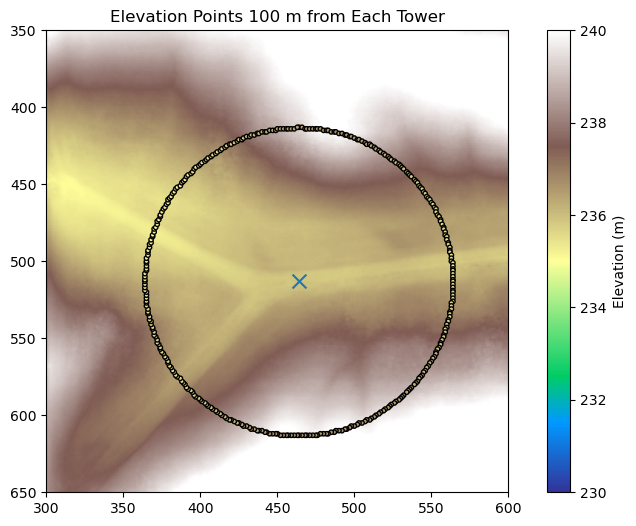

In [100]:
# Plot elevation points for each tower at 100 m distance
plt.figure(figsize=(10, 6))
with rasterio.open(os.path.join(land_dir, dem_1m_proj)) as src:
    elevation = src.read(1)
    transform = src.transform
    bounds = src.bounds
    crs = src.crs
    plt.imshow(elevation, cmap='terrain', vmin=230, vmax=240)
    plt.colorbar(label='Elevation (m)')
    for tower, data in towers.items():
        row, col = rasterio.transform.rowcol(transform, data['x_y'][0], data['x_y'][1])
        plt.scatter(col, row, label=data['label'], marker='x', s=100)
    # use the same color bar as the elevation map
    for tower_key in towers.keys():
        tower_points = elevation_points[elevation_points['tower'] == tower_key]
        plt.scatter(tower_points['col'], tower_points['row'], c=tower_points['elevation'], label=towers[tower_key]['label'], s=10, cmap='terrain', vmin=220, vmax=250, edgecolors='black')
    # add colorbar for elevation points
    
    plt.xlim(300, 600)
    plt.ylim(650, 350)
    # plt.legend()
    plt.title('Elevation Points 100 m from Each Tower')
    # plt.tight_layout()
    plt.show()

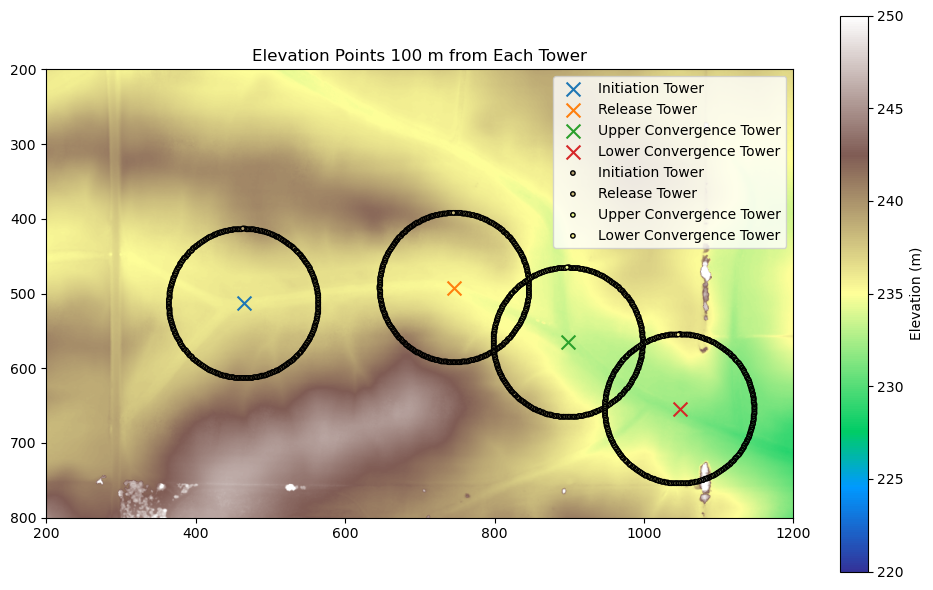

In [ ]:
# Plot elevation points for each tower at 100 m distance
plt.figure(figsize=(10, 6))
with rasterio.open(os.path.join(land_dir, dem_1m_proj)) as src:
    elevation = src.read(1)
    transform = src.transform
    bounds = src.bounds
    crs = src.crs
    plt.imshow(elevation, cmap='terrain', vmin=220, vmax=250)
    plt.colorbar(label='Elevation (m)')
    for tower, data in towers.items():
        row, col = rasterio.transform.rowcol(transform, data['x_y'][0], data['x_y'][1])
        plt.scatter(col, row, label=data['label'], marker='x', s=100)
    # use the same color bar as the elevation map
    for tower_key in towers.keys():
        tower_points = elevation_points[elevation_points['tower'] == tower_key]
        plt.scatter(tower_points['col'], tower_points['row'], c=tower_points['elevation'], label=towers[tower_key]['label'], s=10, cmap='terrain', vmin=220, vmax=250, edgecolors='black')
    # add colorbar for elevation points
    
    plt.xlim(200, 1200)
    plt.ylim(800, 200)
    plt.legend()
    plt.title('Elevation Points 100 m from Each Tower')
    plt.tight_layout()
    plt.show()

In [42]:
elevation_points[elevation_points['distance']==100]

,tower,distance,bearing,row,col,elevation,delta_elevation
0,init,100,0,413,464,239.314774,3.410156
1,init,100,1,413,466,239.431839,3.527222
2,init,100,2,414,468,239.515533,3.610916
3,init,100,3,414,469,239.497940,3.593323
4,init,100,4,414,471,239.628769,3.724152
...,...,...,...,...,...,...,...
1435,lconv,100,355,555,1039,235.560974,3.819397
1436,lconv,100,356,555,1041,235.635803,3.894226
1437,lconv,100,357,555,1043,235.701340,3.959763
1438,lconv,100,358,555,1044,235.722397,3.980820


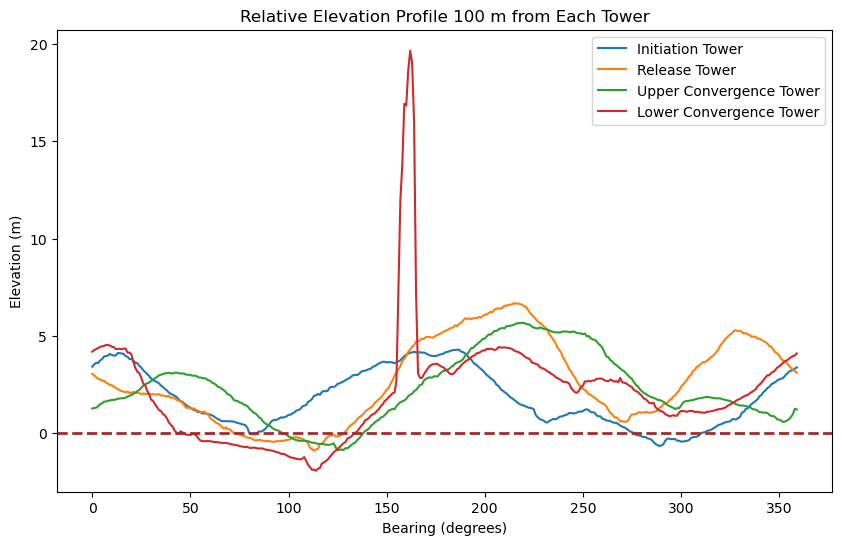

In [46]:

elevation_points_100 = elevation_points[elevation_points['distance']==100]

plt.figure(figsize=(10, 6))
for tower_key in towers.keys():
     tower_points = elevation_points_100[elevation_points_100['tower'] == tower_key]
     plt.plot(tower_points['bearing'], tower_points['delta_elevation'], label=towers[tower_key]['label'])
plt.xlabel('Bearing (degrees)')
plt.ylabel('Elevation (m)')
plt.legend()
plt.title('Relative Elevation Profile 100 m from Each Tower')

plt.axhline(y=0, color='brown', linestyle='--', linewidth=2, label='Equal Elevation')

plt.show()

AttributeError: Line2D.set() got an unexpected keyword argument 'cmap'

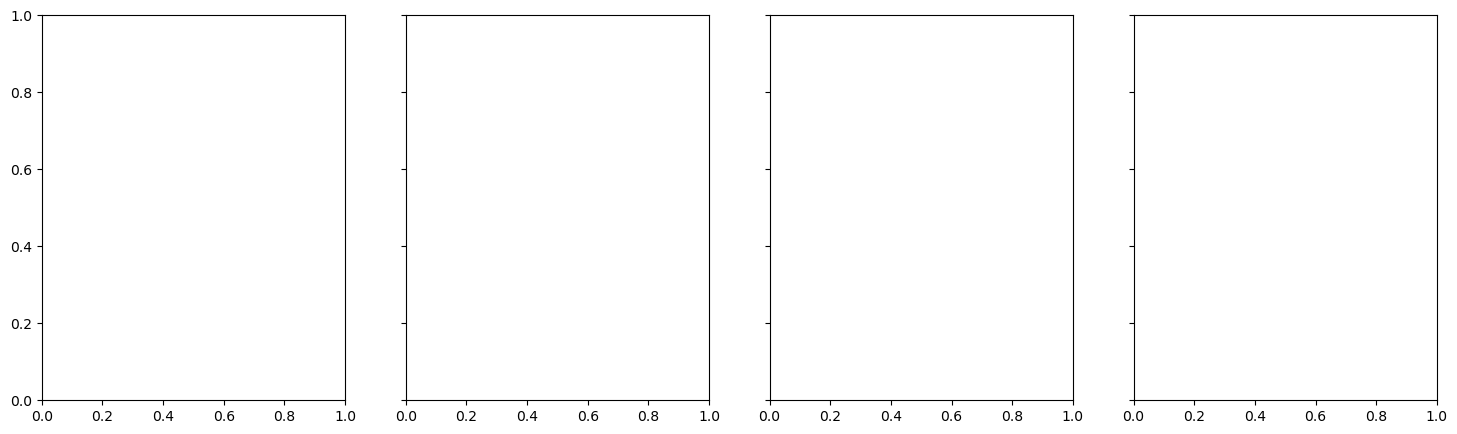

In [68]:
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharex=True, sharey=True)

for ax, tower_key in zip(axes, towers.keys()):
     tower_points = elevation_points_100[elevation_points_100['tower'] == tower_key]
     ax.plot(tower_points['bearing'], tower_points['delta_elevation'], cmap='terrain', vmin=220, vmax=250)
     ax.set_title(towers[tower_key]['label'])
     ax.set_xlabel('Bearing (degrees)')
     ax.set_ylabel('Elevation (m)')
     ax.axhline(y=0, color='brown', linestyle='--', linewidth=2)
     ax.legend()


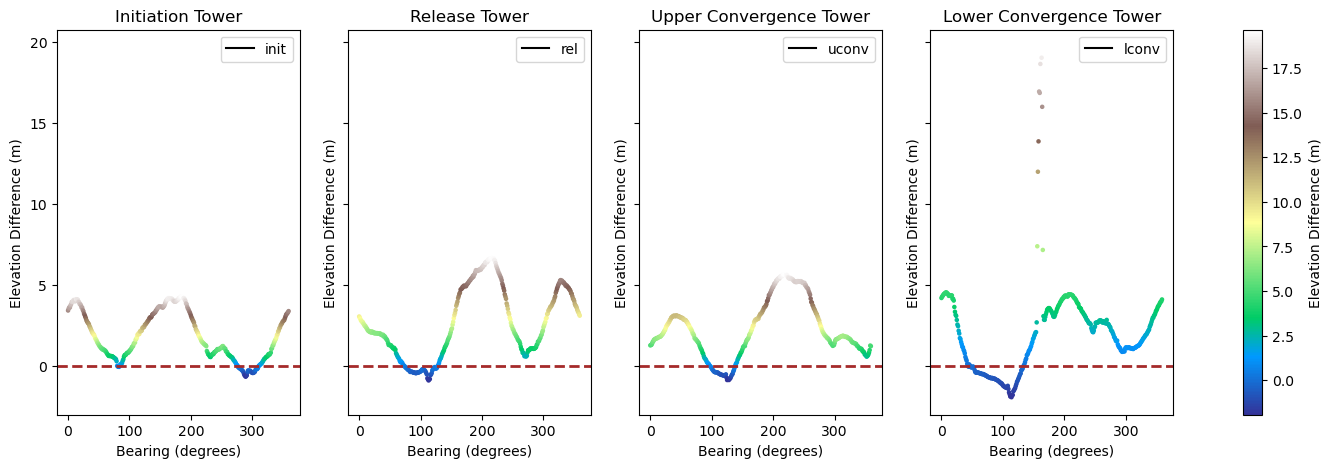

In [72]:
# Create a figure and axes with shared x and y axes
fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharex=True, sharey=True)

for ax, tower_key in zip(axes, towers.keys()):
    # Filter the DataFrame for the current tower
    tower_points = elevation_points_100[elevation_points_100['tower'] == tower_key]
    
    # Use ax.scatter to plot the points, mapping the color to 'delta_elevation'
    # The 's' argument controls the size of the markers
    # The 'c' argument provides the data for the colormap
    sc = ax.scatter(tower_points['bearing'], tower_points['delta_elevation'],
                    s=5, c=tower_points['delta_elevation'], cmap='terrain')
    
    ax.set_title(towers[tower_key]['label'])
    ax.set_xlabel('Bearing (degrees)')
    ax.set_ylabel('Elevation Difference (m)')
    ax.axhline(y=0, color='brown', linestyle='--', linewidth=2)
    
    # Create a dummy legend for the tower line, as scatter doesn't have a label argument
    ax.plot([], [], label=tower_key, color='black')
    ax.legend()
    
# Add a colorbar to the figure
# This is a critical step to explain the color mapping
fig.colorbar(sc, ax=axes, orientation='vertical', label='Elevation Difference (m)')

# Adjust layout
# fig.tight_layout()

plt.show()

In [34]:
towers['init']

{'name': 'init',
 'label': 'Initiation Tower',
 'lat_lon_str': '40°12′41.4576′′N,88°24′37.98′′W',
 'lat_lon': [40.211516, -88.41055],
 'x_y': [293426.78451102215, 393488.8263018386],
 'elvation': np.float32(235.90462)}

In [50]:
# Load inversion and SR data
invdf=pd.read_pickle("data/inversions/inversiontimeswithwinds.pkl")
SR=pd.read_pickle("data/SRAll.pkl")
print("inversion data loaded")

inversion data loaded


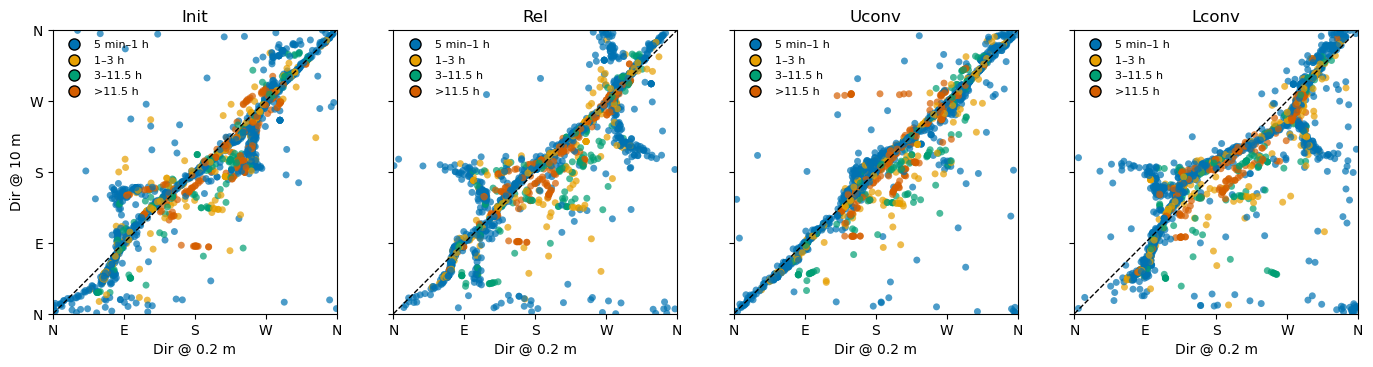

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

# Tower configs
tower_vars = {
    "Init":  {"dir_low": "Dir_0_2m_init",  "dir_high": "dir_10m_init"},
    "Rel":   {"dir_low": "Dir_0_2m_rel",   "dir_high": "dir_10m_rel"},
    "Uconv": {"dir_low": "Dir_0_2m_uconv", "dir_high": "dir_10m_uconv"},
    "Lconv": {"dir_low": "Dir_0_2m_lconv", "dir_high": "dir_10m_lconv"},
}

# Duration bins (hours)
bins = [0, 1, 3, 11.5, np.inf]
labels = ["5 min–1 h", "1–3 h", "3–11.5 h", ">11.5 h"]

# Color-blind–friendly palette (Okabe–Ito)
colors = ["#0072B2", "#E69F00", "#009E73", "#D55E00"]
cmap = ListedColormap(colors)
norm = BoundaryNorm(bins, cmap.N)

# Cardinal ticks
cardinal_ticks = [0, 90, 180, 270, 360]
cardinal_labels = ["N", "E", "S", "W", "N"]

fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharex=True, sharey=True)

for ax, (tower, cols) in zip(axes, tower_vars.items()):
    dir_low  = invdf[cols["dir_low"]]
    dir_high = invdf[cols["dir_high"]]
    duration = invdf["Duration (min)"]/60

    mask = dir_low.notna() & dir_high.notna() & duration.notna()
    dir_low  = dir_low[mask]
    dir_high = dir_high[mask]
    duration = duration[mask]

    sc = ax.scatter(
        dir_low, dir_high,
        c=duration, cmap=cmap, norm=norm,
        s=25, alpha=0.7, edgecolor="none"
    )

    ax.set_xlim(0, 360)
    ax.set_ylim(0, 360)
    ax.set_aspect("equal")
    ax.set_title(tower)

    # Cardinal ticks
    ax.set_xticks(cardinal_ticks)
    ax.set_xticklabels(cardinal_labels)
    ax.set_yticks(cardinal_ticks)
    ax.set_yticklabels(cardinal_labels)

    ax.set_xlabel("Dir @ 0.2 m")
    if ax is axes[0]:
        ax.set_ylabel("Dir @ 10 m")

    # 1:1 line with label
    ax.plot([0, 360], [0, 360], color="black", linestyle="--",
            linewidth=1, label="Aligned winds")
    #ax.legend(loc="lower right", fontsize=8, frameon=False)

    # 🔑 Create a custom legend for duration bins
    handles = []
    for color, label in zip(colors, labels):
        handles.append(
            plt.Line2D([], [], marker="o", color="none",
                       markerfacecolor=color, markersize=8, label=label)
        )

    ax.legend(handles=handles, loc="upper left", fontsize=8, frameon=False)

plt.subplots_adjust(right=0.85)
plt.show()

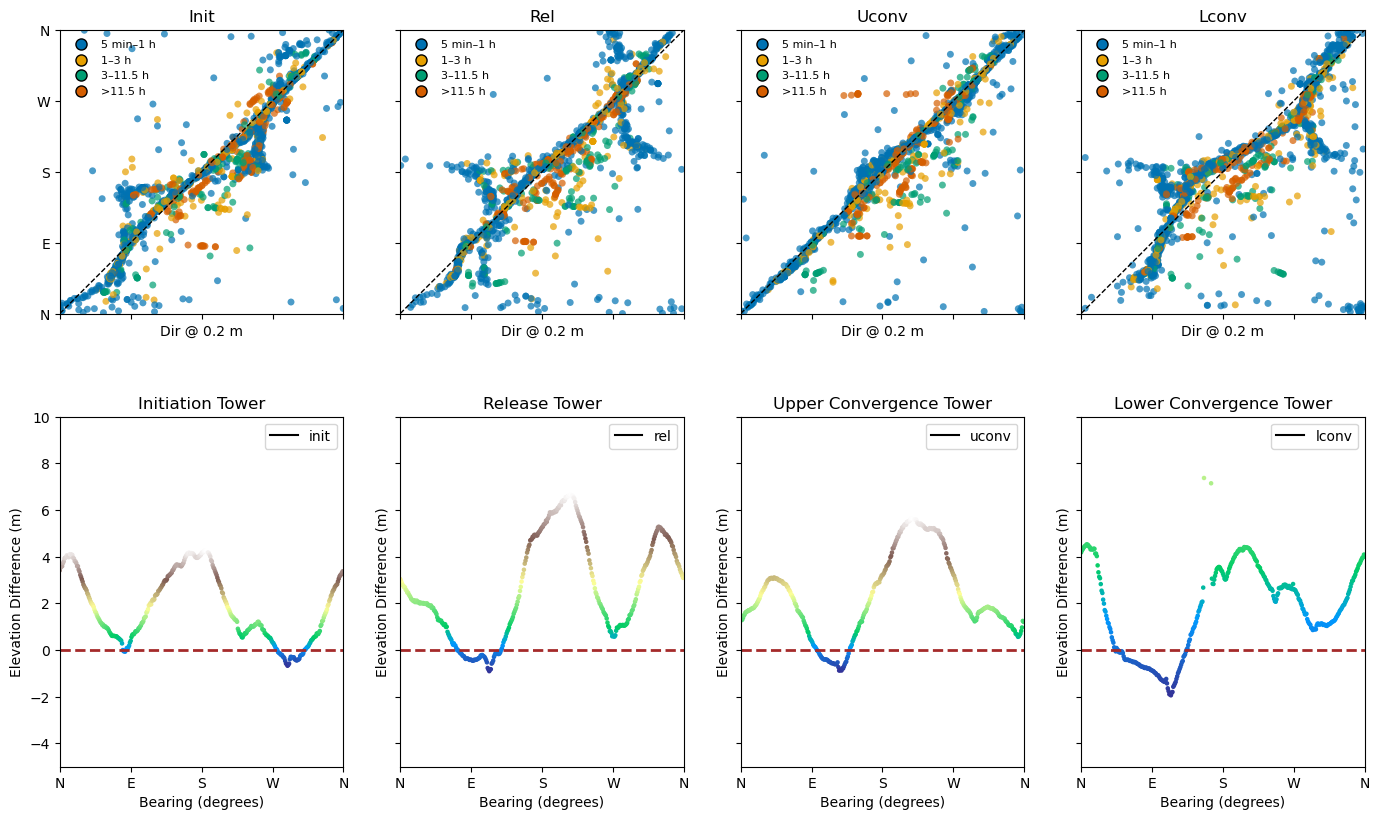

In [78]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm


# Tower configs
tower_vars = {
    "Init":  {"dir_low": "Dir_0_2m_init",  "dir_high": "dir_10m_init"},
    "Rel":   {"dir_low": "Dir_0_2m_rel",   "dir_high": "dir_10m_rel"},
    "Uconv": {"dir_low": "Dir_0_2m_uconv", "dir_high": "dir_10m_uconv"},
    "Lconv": {"dir_low": "Dir_0_2m_lconv", "dir_high": "dir_10m_lconv"},
}

# Duration bins (hours)
bins = [0, 1, 3, 11.5, np.inf]
labels = ["5 min–1 h", "1–3 h", "3–11.5 h", ">11.5 h"]

# Color-blind–friendly palette (Okabe–Ito)
colors = ["#0072B2", "#E69F00", "#009E73", "#D55E00"]
cmap = ListedColormap(colors)
norm = BoundaryNorm(bins, cmap.N)

# Cardinal ticks
cardinal_ticks = [0, 90, 180, 270, 360]
cardinal_labels = ["N", "E", "S", "W", "N"]


# plot two rows of subplots
fig, axes = plt.subplots(2, 4, figsize=(18, 10), sharex='col', sharey='row')
# fig, axes = plt.subplots(1, 4, figsize=(18, 5), sharex=True, sharey=True)

for ax, (tower, cols) in zip(axes[0], tower_vars.items()):
    
    dir_low  = invdf[cols["dir_low"]]
    dir_high = invdf[cols["dir_high"]]
    duration = invdf["Duration (min)"]/60

    mask = dir_low.notna() & dir_high.notna() & duration.notna()
    dir_low  = dir_low[mask]
    dir_high = dir_high[mask]
    duration = duration[mask]

    sc = ax.scatter(
        dir_low, dir_high,
        c=duration, cmap=cmap, norm=norm,
        s=25, alpha=0.7, edgecolor="none"
    )

    ax.set_xlim(0, 360)
    ax.set_ylim(0, 360)
    ax.set_aspect("equal")
    ax.set_title(tower)

    # Cardinal ticks
    ax.set_xticks(cardinal_ticks)
    ax.set_xticklabels(cardinal_labels)
    ax.set_yticks(cardinal_ticks)
    ax.set_yticklabels(cardinal_labels)

    ax.set_xlabel("Dir @ 0.2 m")
    if ax is axes[0]:
        ax.set_ylabel("Dir @ 10 m")

    # 1:1 line with label
    ax.plot([0, 360], [0, 360], color="black", linestyle="--",
            linewidth=1, label="Aligned winds")
    #ax.legend(loc="lower right", fontsize=8, frameon=False)

    # 🔑 Create a custom legend for duration bins
    handles = []
    for color, label in zip(colors, labels):
        handles.append(
            plt.Line2D([], [], marker="o", color="none",
                       markerfacecolor=color, markersize=8, label=label)
        )

    ax.legend(handles=handles, loc="upper left", fontsize=8, frameon=False)

for ax, tower_key in zip(axes[1], towers.keys()):
    # Filter the DataFrame for the current tower
    tower_points = elevation_points_100[elevation_points_100['tower'] == tower_key]
    
    # Use ax.scatter to plot the points, mapping the color to 'delta_elevation'
    # The 's' argument controls the size of the markers
    # The 'c' argument provides the data for the colormap
    sc = ax.scatter(tower_points['bearing'], tower_points['delta_elevation'],
                    s=5, c=tower_points['delta_elevation'], cmap='terrain')
    
    ax.set_title(towers[tower_key]['label'])
    ax.set_xlabel('Bearing (degrees)')
    ax.set_ylabel('Elevation Difference (m)')
    ax.axhline(y=0, color='brown', linestyle='--', linewidth=2)
    
    # Create a dummy legend for the tower line, as scatter doesn't have a label argument
    ax.plot([], [], label=tower_key, color='black')
    ax.legend()

for ax in axes[1]:
    ax.set_ylim(-5, 10)
    
# Add a colorbar to the figure
# This is a critical step to explain the color mapping
# fig.colorbar(sc, ax=axes, orientation='vertical', label='Elevation Difference (m)')

plt.subplots_adjust(right=0.85)
plt.show()

c:\Users\bmaro\miniconda3\envs\unidata\Lib\site-packages\matplotlib\colorbar.py:1233: RuntimeWarning: invalid value encountered in divide
  y = y / (self._boundaries[self._inside][-1] -


ValueError: Axis limits cannot be NaN or Inf

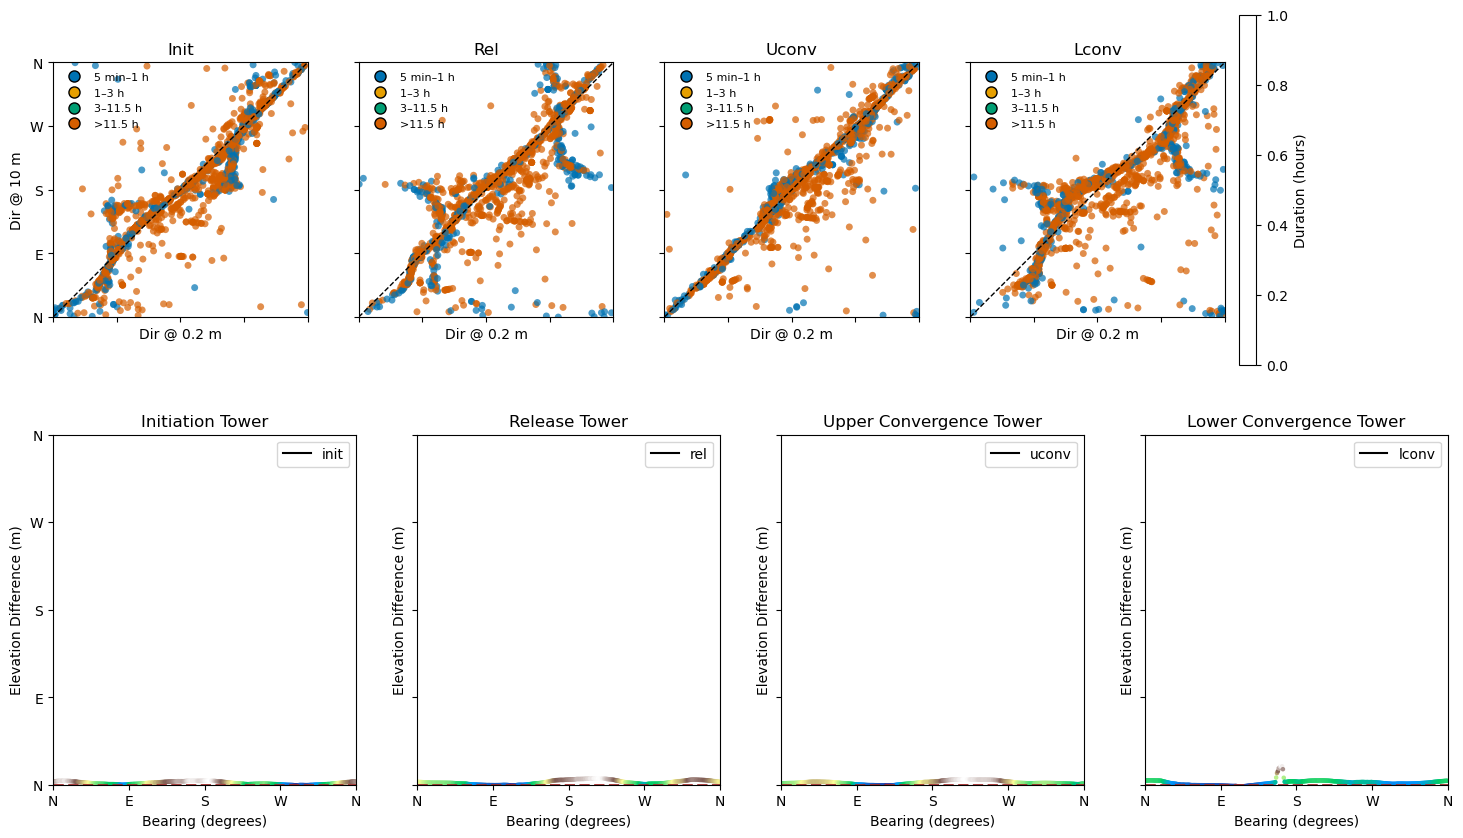

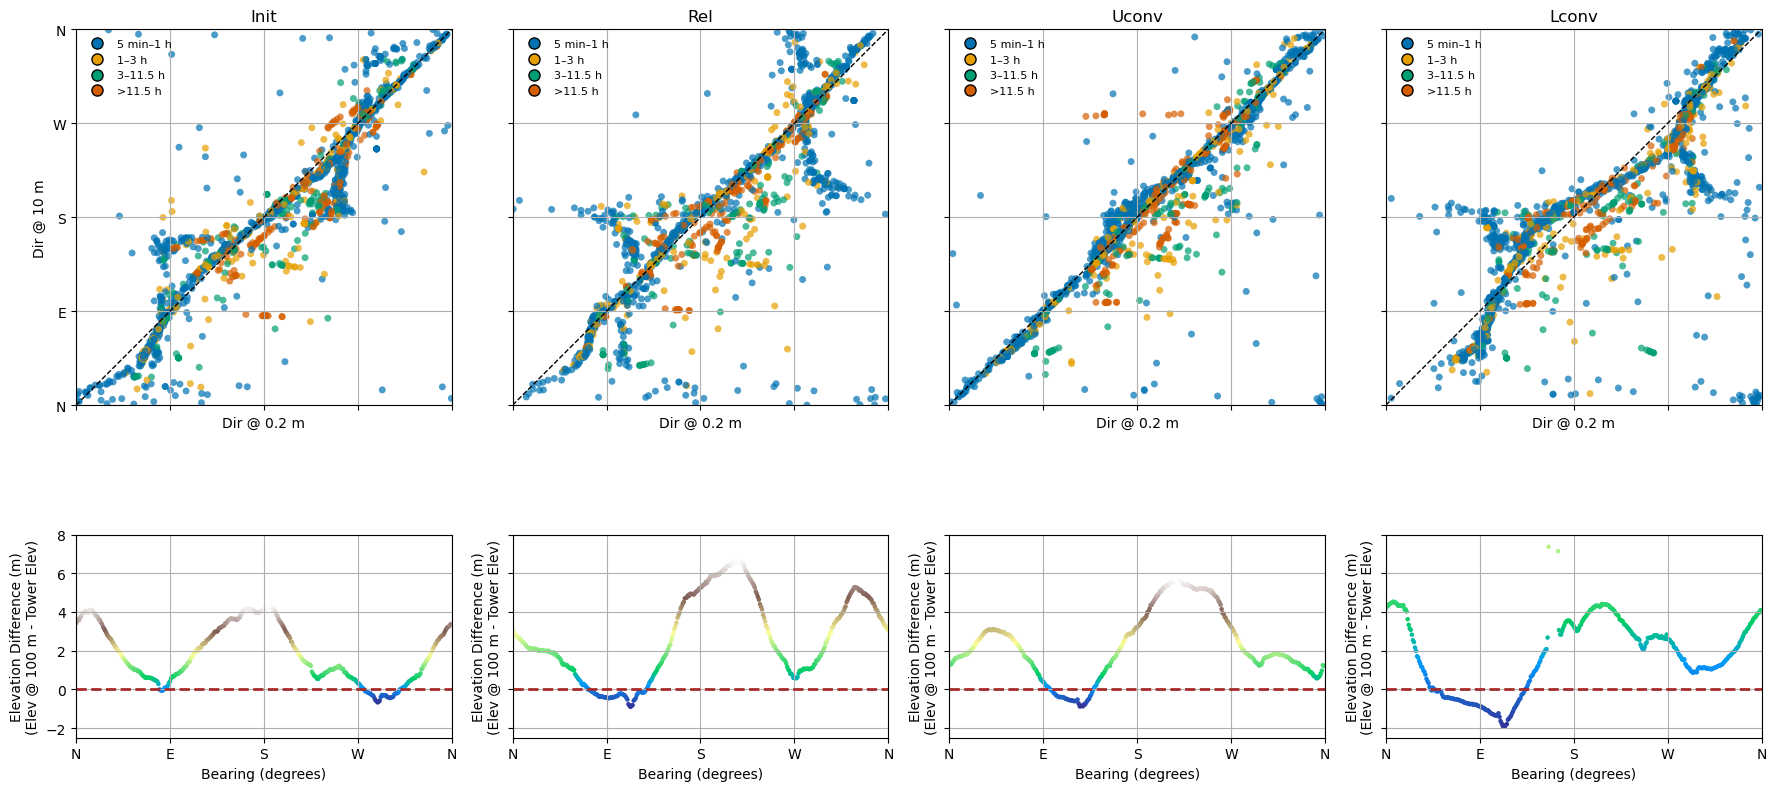

In [104]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm
import pandas as pd

# Tower configs
tower_vars = {
    "Init":  {"dir_low": "Dir_0_2m_init",  "dir_high": "dir_10m_init"},
    "Rel":   {"dir_low": "Dir_0_2m_rel",   "dir_high": "dir_10m_rel"},
    "Uconv": {"dir_low": "Dir_0_2m_uconv", "dir_high": "dir_10m_uconv"},
    "Lconv": {"dir_low": "Dir_0_2m_lconv", "dir_high": "dir_10m_lconv"},
}

# Duration bins (hours)
bins = [0, 1, 3, 11.5, np.inf]
labels = ["5 min–1 h", "1–3 h", "3–11.5 h", ">11.5 h"]

# Color-blind–friendly palette (Okabe–Ito)
colors = ["#0072B2", "#E69F00", "#009E73", "#D55E00"]
cmap = ListedColormap(colors)
norm = BoundaryNorm(bins, cmap.N)

# Cardinal ticks
cardinal_ticks = [0, 90, 180, 270, 360]
cardinal_labels = ["N", "E", "S", "W", "N"]

# plot two rows of subplots
# Use the gridspec_kw argument to specify the height ratio of the rows
# The first row is twice as tall as the second row in this example.
fig, axes = plt.subplots(
    2, 4, figsize=(18, 10), sharex='col', sharey='row',
    gridspec_kw={'height_ratios': [1, 0.25]}
)

# Top row of subplots
for ax, (tower, cols) in zip(axes[0], tower_vars.items()):
    dir_low  = invdf[cols["dir_low"]]
    dir_high = invdf[cols["dir_high"]]
    duration = invdf["Duration (min)"]/60

    mask = dir_low.notna() & dir_high.notna() & duration.notna()
    dir_low  = dir_low[mask]
    dir_high = dir_high[mask]
    duration = duration[mask]

    sc_top = ax.scatter(
        dir_low, dir_high,
        c=duration, cmap=cmap, norm=norm,
        s=25, alpha=0.7, edgecolor="none"
    )

    ax.set_xlim(0, 360)
    ax.set_ylim(0, 360)
    ax.set_aspect("equal")
    ax.set_title(tower)

    # Cardinal ticks
    ax.set_xticks(cardinal_ticks)
    ax.set_xticklabels(cardinal_labels)
    ax.set_yticks(cardinal_ticks)
    ax.set_yticklabels(cardinal_labels)

    ax.set_xlabel("Dir @ 0.2 m")
    if ax is axes[0][0]:
        ax.set_ylabel("Dir @ 10 m")

    # 1:1 line with label
    ax.plot([0, 360], [0, 360], color="black", linestyle="--",
            linewidth=1, label="Aligned winds")
    
    # 🔑 Create a custom legend for duration bins
    handles = []
    for color, label in zip(colors, labels):
        handles.append(
            plt.Line2D([], [], marker="o", color="none",
                       markerfacecolor=color, markersize=8, label=label)
        )
    ax.legend(handles=handles, loc="upper left", fontsize=8, frameon=False)
    ax.grid(True)

# Bottom row of subplots
for ax, tower_key in zip(axes[1], towers.keys()):
    # Filter the DataFrame for the current tower
    tower_points = elevation_points_100[elevation_points_100['tower'] == tower_key]
    
    # Use ax.scatter to plot the points, mapping the color to 'delta_elevation'
    # The 's' argument controls the size of the markers
    # The 'c' argument provides the data for the colormap
    sc_bottom = ax.scatter(tower_points['bearing'], tower_points['delta_elevation'],
                    s=5, c=tower_points['delta_elevation'], cmap='terrain')
    
    # ax.set_title(towers[tower_key]['label'])
    ax.set_xlabel('Bearing (degrees)')
    ax.set_ylabel('Elevation Difference (m)\n(Elev @ 100 m - Tower Elev)')
    ax.axhline(y=0, color='brown', linestyle='--', linewidth=2)
    ax.grid(True)
    
    # Create a dummy legend for the tower line, as scatter doesn't have a label argument
    # ax.plot([], [], label=tower_key, color='black')
    # ax.legend()
for ax in axes[1]:
    ax.set_ylim(-2.5, 8)
# for ax in axes:
#     ax.grid(True)
# plt.subplots_adjust(right=0.85)
plt.tight_layout()
plt.show()